In [1]:
# !pip install geopandas

In [2]:
# geopandas deve essere installato affinchè il codice funzioni
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

In [3]:
datacovregioni = pd.read_csv('covid19_italy_region _python.csv', sep=',')
datacovprovince = pd.read_csv('covid19_italy_province _python.csv', sep=',')
dataripgeo=pd.read_csv('Ripartizione-geografica _python.txt', delimiter='\t', encoding='latin-1')

In [4]:
#Pulizia dei dati comuni
datacomuni = pd.read_excel('Comuni _python.xlsx', header=7, usecols=[0,2,4])
datacomuni['Regione'] = datacomuni['Regione'].str.strip().str.title()
datacomuni=datacomuni[:-1]
datacomuni.dropna(how='all', inplace=True)
datacomuni['Denominazione'] = datacomuni['Denominazione'].astype(str)
datacomuni.isna().sum()

Denominazione      0
Regione            0
Popolazione2011    0
dtype: int64

In [5]:
datacovregioni["Date"] = pd.to_datetime(datacovregioni["Date"])
# Set "data_osservazione" as the index
datacovregioni.set_index("Date", inplace=True)
# Set "data_osservazione" as the index

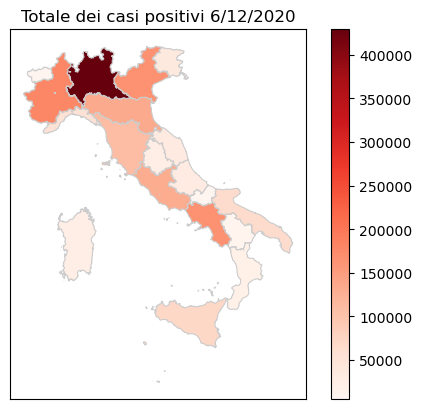

In [6]:
# Mappa italiana con il totale dei casi positivi per regione al giorno 06/12/2020
region_sorted = datacovregioni.sort_index(ascending=False)
regions_last = region_sorted.groupby('RegionName').first()
#https://github.com/openpolis/geojson-italy/blob/master/geojson/limits_IT_regions.geojson 
regioni_geo = gpd.read_file('limits_IT_regions.geojson')
mappa = pd.merge(regions_last, regioni_geo, left_on='RegionCode', right_on='reg_istat_code_num', how='left')
gdf = gpd.GeoDataFrame(mappa, geometry='geometry')
gdf.plot(column='TotalPositiveCases', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True)
plt.xticks([])
plt.yticks([])
plt.title("Totale dei casi positivi 6/12/2020")
plt.show()

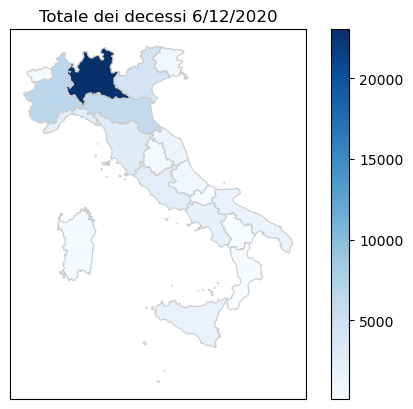

In [7]:
# Mappa italiana con il totale dei decessi per regione al giorno 06/12/2020
gdf.plot(column='Deaths', cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True)
plt.xticks([])
plt.yticks([])
plt.title("Totale dei decessi 6/12/2020")
plt.show()